In this notebook i will compare calibration results from two sphere wideband calibrations. And the results after ebing process with EK80.

In this notebook the environmental parameters has been modified for the .raw files and the TS spectra were manually check for only a single deep null in the 200 kHz

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sphere_ts
import gsw
import math
%matplotlib inline

In [2]:
sns.set_theme(style="whitegrid")
sns.color_palette("viridis", as_cmap=True)
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '13', 'color': 'black'}

In [3]:
plt.rcParams['font.size']= 15
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['axes.labelsize'] = 15

savefigs_path= 'C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/AZKABAN-light/ZoopMix_paper/Figs'
savefigjpg_path= 'C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/AZKABAN-light/ZoopMix_paper/Figs/'

# 200 kHz calibration

In [4]:
EKcal_200_38 = pd.read_xml('F:/Nya-AZKABAN/Calibrations/200kHz/editCT_38_CalibrationDataFile-D20220616-T092948.xml', xpath=".//CalibrationResults")
EKcal_200_22 = pd.read_xml('F:/Nya-AZKABAN/Calibrations/200kHz/editCT_22_CalibrationDataFile-D20220615-T164530.xml', xpath=".//CalibrationResults")

EK_200_38_f = np.fromstring(EKcal_200_38.Frequency[0], dtype=float, sep=';')
EK_200_38_g = np.fromstring(EKcal_200_38.Gain[0], dtype=float, sep=';')
EK_200_38_mn_bw = np.fromstring(EKcal_200_38.BeamWidthAlongship[0], dtype=float, sep=';')
EK_200_38_mj_bw = np.fromstring(EKcal_200_38.BeamWidthAthwartship[0], dtype=float, sep=';')
EK_200_38_mn_ao = np.fromstring(EKcal_200_38.AngleOffsetAlongship[0], dtype=float, sep=';')
EK_200_38_mj_ao = np.fromstring(EKcal_200_38.AngleOffsetAthwartship[0], dtype=float, sep=';')

EK_200_22_f = np.fromstring(EKcal_200_22.Frequency[0], dtype=float, sep=';')
EK_200_22_g = np.fromstring(EKcal_200_22.Gain[0], dtype=float, sep=';')
EK_200_22_mn_bw = np.fromstring(EKcal_200_22.BeamWidthAlongship[0], dtype=float, sep=';')
EK_200_22_mj_bw = np.fromstring(EKcal_200_22.BeamWidthAthwartship[0], dtype=float, sep=';')
EK_200_22_mn_ao = np.fromstring(EKcal_200_22.AngleOffsetAlongship[0], dtype=float, sep=';')
EK_200_22_mj_ao = np.fromstring(EKcal_200_22.AngleOffsetAthwartship[0], dtype=float, sep=';')

Text(0.5, 0, 'Frequency (Hz)')

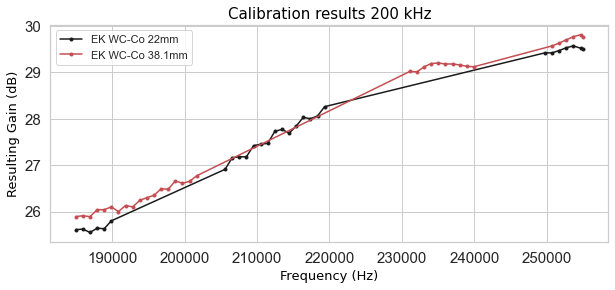

In [5]:
plt.figure(figsize=(10,4))

plt.plot(EK_200_22_f,EK_200_22_g, 'k.-',label='EK WC-Co 22mm')
plt.plot(EK_200_38_f,EK_200_38_g, 'r.-', label='EK WC-Co 38.1mm')
plt.legend()
plt.title('Calibration results 200 kHz',title_font)
plt.ylabel('Resulting Gain (dB)',axis_font)
plt.xlabel('Frequency (Hz)',axis_font)

Spheres agreement is acceptable odd

### Let's take a deeper look and compare calibrated TS to theoretical TS


# Assess 200 kHz calibration

### Theoretical response

In [6]:
# sphere_ts : Gavin Macaulay's https://github.com/gavinmacaulay/SphereTS/blob/master/sphere_ts.py
f_start = 185000
f_stop = 255000 #Hz
a = 0.022 #m

sp = 35 #PSU
t = 0 #degC
p = 3 #m or dbar
# Get water properties
c, rho = sphere_ts.water_properties(sp, t, p)

# Get material properties of Tungsten carbide
mat_prop = sphere_ts.material_properties()
WC_Co = mat_prop['Tungsten carbide']

# Doesn't quite work...
freq_22, ts_22 =sphere_ts.freq_response(f_start, f_stop, a, 1446.56, WC_Co['c1'], WC_Co['c2'], rho, 1950)

In [7]:
c


1449.0552021335316

In [8]:
# theoretical 22 mm from EK80
SBcal_22 = pd.read_xml('F:/Nya-AZKABAN/Calibrations/200kHz/editCT_22_CalibrationDataFile-D20220615-T164530.xml', xpath=".//TargetReference")
freq_22 =np.fromstring(SBcal_22.Frequency[0], dtype=float, sep=';')
ts_22 =np.fromstring(SBcal_22.Response[0], dtype=float, sep=';')

In [9]:
## theoretical 38 mm from EK80

SBcal_38 = pd.read_xml('F:/Nya-AZKABAN/Calibrations/200kHz/editCT_38_CalibrationDataFile-D20220616-T154702.xml', xpath=".//TargetReference")
freq_38 =np.fromstring(SBcal_38.Frequency[0], dtype=float, sep=';')
ts_38 =np.fromstring(SBcal_38.Response[0], dtype=float, sep=';')

### Wideband frequency response exports from Echoview with different calibration parameters

# Combine spheres
For .ecs file do all cal params

## 200 kHz

In [10]:
# Start with 38.1 mm
ind_38 = np.where(np.diff(EK_200_38_f)>1000)[0]+1
ind_22 = np.where(np.diff(EK_200_22_f)>1000)[0]+1

In [11]:
# Combine with gain from 38.1 then 22 then 38.1
freq_200_combined = np.concatenate((EK_200_38_f[0:ind_38[0]], 
                                    EK_200_22_f[ind_22[0]:ind_22[1]],
                                    EK_200_38_f[ind_38[0]:ind_38[1]],
                                    EK_200_22_f[ind_22[1]:]))
gain_200_combined = np.concatenate((EK_200_38_g[0:ind_38[0]], 
                                    EK_200_22_g[ind_22[0]:ind_22[1]],
                                    EK_200_38_g[ind_38[0]:ind_38[1]],
                                    EK_200_22_g[ind_22[1]:]))
mj_ao_200_combined = np.concatenate((EK_200_38_mj_ao[0:ind_38[0]], 
                                     EK_200_22_mj_ao[ind_22[0]:ind_22[1]],
                                     EK_200_38_mj_ao[ind_38[0]:ind_38[1]], 
                                     EK_200_22_mj_ao[ind_22[1]:]))
mn_ao_200_combined = np.concatenate((EK_200_38_mn_ao[0:ind_38[0]], 
                                     EK_200_22_mn_ao[ind_22[0]:ind_22[1]],
                                     EK_200_38_mn_ao[ind_38[0]:ind_38[1]], 
                                     EK_200_22_mn_ao[ind_22[1]:]))
mj_bw_200_combined = np.concatenate((EK_200_38_mj_bw[0:ind_38[0]], 
                                     EK_200_22_mj_bw[ind_22[0]:ind_22[1]],
                                     EK_200_38_mj_bw[ind_38[0]:ind_38[1]], 
                                     EK_200_22_mj_bw[ind_22[1]:]))
mn_bw_200_combined = np.concatenate((EK_200_38_mn_bw[0:ind_38[0]], 
                                     EK_200_22_mn_bw[ind_22[0]:ind_22[1]],
                                     EK_200_38_mn_bw[ind_38[0]:ind_38[1]],
                                     EK_200_22_mn_bw[ind_22[1]:]))

In [12]:
# Combine with gain from 38.1 then 22 then 38.1
freq_200_combined = np.concatenate((EK_200_38_f[0:ind_38[0]], 
                                    EK_200_22_f[ind_22[0]:ind_22[1]],
                                    EK_200_38_f[ind_38[0]:]))
gain_200_combined = np.concatenate((EK_200_38_g[0:ind_38[0]], 
                                    EK_200_22_g[ind_22[0]:ind_22[1]],
                                    EK_200_38_g[ind_38[0]:]))
mj_ao_200_combined = np.concatenate((EK_200_38_mj_ao[0:ind_38[0]], 
                                     EK_200_22_mj_ao[ind_22[0]:ind_22[1]],
                                     EK_200_38_mj_ao[ind_38[0]:]))
mn_ao_200_combined = np.concatenate((EK_200_38_mn_ao[0:ind_38[0]], 
                                     EK_200_22_mn_ao[ind_22[0]:ind_22[1]],
                                     EK_200_38_mn_ao[ind_38[0]:]))
mj_bw_200_combined = np.concatenate((EK_200_38_mj_bw[0:ind_38[0]], 
                                     EK_200_22_mj_bw[ind_22[0]:ind_22[1]],
                                     EK_200_38_mj_bw[ind_38[0]:]))
mn_bw_200_combined = np.concatenate((EK_200_38_mn_bw[0:ind_38[0]], 
                                     EK_200_22_mn_bw[ind_22[0]:ind_22[1]],
                                     EK_200_38_mn_bw[ind_38[0]:]))

In [13]:
print(mj_bw_200_combined)

[7.45 7.52 7.43 7.29 7.2  7.16 7.22 7.2  7.11 7.06 7.06 7.02 6.95 6.9
 6.83 6.82 6.77 6.81 6.33 6.31 6.26 6.24 6.18 6.16 6.12 6.06 6.1  6.1
 6.07 6.   5.95 5.88 5.86 6.18 6.11 6.04 6.   5.97 5.97 5.91 5.85 5.86
 5.94 5.61 5.65 5.63 5.57 5.55 5.56]


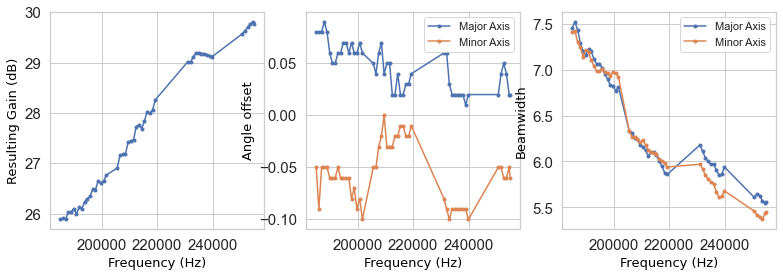

In [14]:
fig, ax = plt.subplots(1,3,figsize=(13,4))

ax[0].plot(freq_200_combined, gain_200_combined, '.-')
ax[0].set_ylabel('Resulting Gain (dB)',axis_font)
ax[0].set_xlabel('Frequency (Hz)',axis_font)

ax[1].plot(freq_200_combined, mj_ao_200_combined, '.-', label='Major Axis')
ax[1].plot(freq_200_combined, mn_ao_200_combined, '.-', label='Minor Axis')
ax[1].set_ylabel('Angle offset',axis_font)
ax[1].set_xlabel('Frequency (Hz)',axis_font)
ax[1].legend()

ax[2].plot(freq_200_combined, mj_bw_200_combined, '.-', label='Major Axis')
ax[2].plot(freq_200_combined, mn_bw_200_combined, '.-', label='Minor Axis')
ax[2].set_ylabel('Beamwidth',axis_font)
ax[2].set_xlabel('Frequency (Hz)',axis_font)
ax[2].legend()

In [15]:
EKcal_200_combo_22 = pd.read_csv('F:/Nya-AZKABAN/Calibrations/200kHz/EK_200_TScal_combined_22mm_edit2.csv',skiprows=14,header=None, usecols=[0,1], names=['freqs', 'TS'])
EKcal_200_combo_38 = pd.read_csv('F:/Nya-AZKABAN/Calibrations/200kHz/EK_200_TScal_combined_38mm_edit2.csv',skiprows=14,header=None, usecols=[0,1], names=['freqs', 'TS'])

C:\Users\mbd\anaconda3\envs\phd-env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "purple" (-> color=(0.5019607843137255, 0.0, 0.5019607843137255, 1.0)). The keyword argument will take precedence.
  """
C:\Users\mbd\anaconda3\envs\phd-env\lib\site-packages\ipykernel_launcher.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "magenta" (-> color=(1.0, 0.0, 1.0, 1.0)). The keyword argument will take precedence.
  import sys


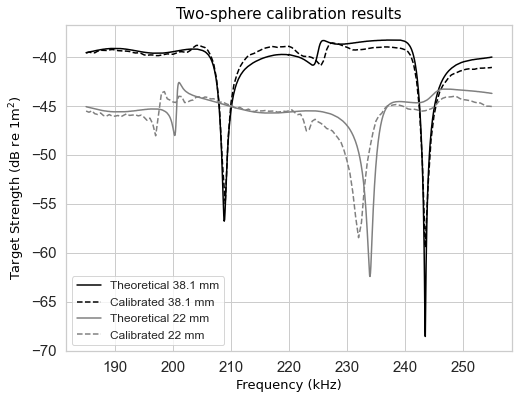

In [25]:
plt.figure(figsize=(8,6))
ax = plt.subplot(1,1,1)

# plot calibrations and theoretical
plt.plot(freq_38/1000, ts_38, 'purple', c='black', label='Theoretical 38.1 mm')
plt.plot(EKcal_200_combo_38.freqs, EKcal_200_combo_38.TS,'--', c='black', label='Calibrated 38.1 mm')
plt.plot(freq_22/1000, ts_22, 'magenta', c='grey', label='Theoretical 22 mm')
plt.plot(EKcal_200_combo_22.freqs, EKcal_200_combo_22.TS, '--', c='grey', label='Calibrated 22 mm')


plt.title('Two-sphere calibration results',title_font)
plt.ylabel('Target Strength (dB re 1m$^2$)',axis_font)
plt.xlabel('Frequency (kHz)',axis_font)
plt.legend(fontsize=12)

ax.set_rasterized(True)
fig.savefig(savefigs_path+'FigureCal.pdf', format='pdf', dpi = 300, facecolor='w', bbox_inches='tight')
fig.savefig(savefigjpg_path+'FigureCal.jpg', format='jpg', dpi = 300, facecolor='w', bbox_inches='tight')